In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import copy
from collections import Counter
from datetime import datetime, timedelta



In [21]:
# reads csv and removes the subs
df = pd.read_csv("matches.csv", header=None)
df = df[(df.index + 1) % 4 != 0] 
df.head(20)

,0,1
0,Daniel Bielin,Jerry Wang
1,William Zhang,Clarence Un
2,Andy Wang,Edwin Yee
4,Isabelle Rusli,Jessica Wang
5,Julie Yang,Sydney Lim
6,Hallie Hou,Crystal Le
8,Daniel Bielin/Andrew Wang,Jerry Wang/Clarence Un
9,Yunus Chang/Brenden Cheung,Zach Streifer/Thomas Yu
10,Andy Wang/Harry Qin,Samuel Fong/David Qiguan
12,Isabelle Rusli/Julie Yang,Jessica Wang/Junyu Deng


In [22]:
matches = []
for index, row in df.iterrows(): 
    matches.append([row[0], row[1]])
print(matches)
print(len(matches))

[['Daniel Bielin', 'Jerry Wang'], ['William Zhang', 'Clarence Un'], ['Andy Wang', 'Edwin Yee'], ['Isabelle Rusli', 'Jessica Wang'], ['Julie Yang', 'Sydney Lim'], ['Hallie Hou', 'Crystal Le'], ['Daniel Bielin/Andrew Wang', 'Jerry Wang/Clarence Un'], ['Yunus Chang/Brenden Cheung', 'Zach Streifer/Thomas Yu'], ['Andy Wang/Harry Qin', 'Samuel Fong/David Qiguan'], ['Isabelle Rusli/Julie Yang', 'Jessica Wang/Junyu Deng'], ['Kyra Sunil/Isa Griffis', 'Cori Yim/Emily Lombardi'], ['Emily La/Kelly Ha', 'Yongsi Zhu/Crystal Le'], ['William Zhang/Rinna Yu', 'Zach Streifer/Junyu Deng'], ['Harry Qin/Miranda Li', 'Thomas Yu/Sydney Lim'], ['Yu-Chen Lung/Emily La', 'Edwin Yee/Emily Lombardi'], ['Andrew Wang', 'Harshith Kaveri'], ['Brenden Cheung', 'Matthew Go'], ['JJ Choon', 'Vik Sirivong'], ['Isabelle Rusli', 'Celeste Liu'], ['Julie Yang', 'Erika Lai'], ['Hallie Hou', 'Athena Aguilar'], ['Ethan Lin/Jeremy Chen', 'Andrew Yeow/Muhammad Ramadhan'], ['JJ Choon/Samuel Chua Jia Cong', 'Matthew Go/Daniel Chang'

In [23]:
# remove whitespace and forfeited matches
# reformat matches to be a set of tuples of players in the match
    
allPlayerInstances = []
reformattedMatches = []


isNotForfeit = lambda entry : type(entry) == str and not ("Forfeited" in entry or "Forfeit" in entry)
matches = [match for match in matches if isNotForfeit(match[0]) and isNotForfeit(match[1])]
print(len(matches))

for match in matches:
    matchEntry = []
    for i in range(2):
        matchPlayers = match[i].split('/')
        for player in matchPlayers:
            player = player.strip()
            allPlayerInstances.append(player)
            matchEntry.append(player)

    reformattedMatches.append(matchEntry)
            
players = Counter(allPlayerInstances)
print(players.most_common())

reformattedMatches = [tuple(match) for match in reformattedMatches]
print(reformattedMatches)

            

144
[('Erika Lai', 10), ('Athena Aguilar', 10), ('Harshith Kaveri', 8), ('Matthew Go', 8), ('Andrew Yeow', 8), ('Muhammad Ramadhan', 8), ('Vivian Yuan', 8), ('Vik Sirivong', 6), ('Mihir Raja', 6), ('Kyle Pan', 6), ('Venkata Neti', 6), ('Melody Yang', 6), ('Dylan Zou', 6), ('Anthony Wu', 6), ('Tammy Xie', 6), ('Janelle Chan', 6), ('Elisa Liu', 6), ('Kailin Liu', 6), ('Chenyi Zhao', 6), ('Joanna Chou', 6), ('Emma Chen', 5), ('Daniel Fung', 5), ('Manmeeth Nagesh', 5), ('Lilly Nguyen', 5), ('Wein Hsu', 5), ('Max Li', 5), ('Jessica Nguy', 5), ('Julia Richardson', 5), ('Jerry Wang', 4), ('Clarence Un', 4), ('Edwin Yee', 4), ('Isabelle Rusli', 4), ('Jessica Wang', 4), ('Julie Yang', 4), ('Sydney Lim', 4), ('Crystal Le', 4), ('Zach Streifer', 4), ('Thomas Yu', 4), ('Junyu Deng', 4), ('Emily Lombardi', 4), ('Reno Guo', 4), ('Kaia To', 4), ('Jay Chea', 4), ('Jordan Hsu', 4), ('Meghan Wong', 4), ('Timothy Liu', 4), ('Oscar Yan', 4), ('Lantian Xiang', 4), ('Faiz Ishak', 4), ('Yifei Zheng', 4), ('S

In [24]:
# dictionary of player to the player's matches 

masterDictOfPlayerMatches = dict()

for match in reformattedMatches:
    for player in match:
        if player in masterDictOfPlayerMatches:
            masterDictOfPlayerMatches[player].add(match)
        else:
            masterDictOfPlayerMatches[player] = {match}

copyDictOfPlayerMatches = copy.deepcopy(masterDictOfPlayerMatches)

print(copyDictOfPlayerMatches['Harshith Kaveri'])



{('Reno Guo', 'Harshith Kaveri'), ('Ethan Lin', 'Julie Yang', 'Harshith Kaveri', 'Vivian Yuan'), ('Mihir Raja', 'Tammy Xie', 'Harshith Kaveri', 'Vivian Yuan'), ('Huy Nguyen', 'Lynette Loo', 'Harshith Kaveri', 'Vivian Yuan'), ('Mihir Raja', 'Harshith Kaveri'), ('Andrew Wang', 'Harshith Kaveri'), ('Daniel Fung', 'Harshith Kaveri'), ('Max Li', 'Kailin Liu', 'Harshith Kaveri', 'Vivian Yuan')}


In [25]:
# helper function to score matches


def scoreMatch(match, player_dict=copyDictOfPlayerMatches):
    score = 0
    for player in match:
        score += (len(player_dict[player]) - 1) # note: -1 to exclude the match being scored
    return score if len(match) == 4 else score*2 # doubles match score if it's a single game


# print(copyDictOfPlayerMatches['Benji Ryujin'])
# print(copyDictOfPlayerMatches['Andrew Li'])
# print(copyDictOfPlayerMatches['Bowen Yang'])
# print(copyDictOfPlayerMatches['Nam Hoang'])

# scoreMatch(('Benji Ryujin', 'Andrew Li', 'Bowen Yang', 'Nam Hoang'))

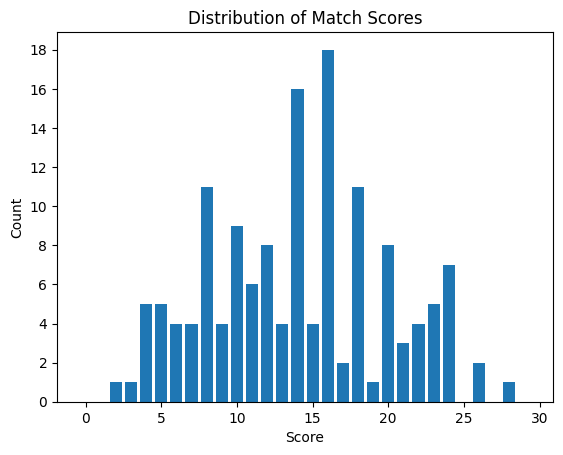

In [26]:
# plot score to number of matches with that score
os.makedirs('schedule', exist_ok=True)

scoreX = list(range(0, 30))
countY = [0] * 30


for match in reformattedMatches:
    countY[scoreMatch(match, player_dict=masterDictOfPlayerMatches)] += 1

fig, ax  = plt.subplots()
ax.bar(scoreX, countY)

minimum_ele = min(countY)
maximum_ele = max(countY)
new_list = range(math.floor(min(countY)), math.ceil(max(countY))+1, 2)

plt.yticks(new_list)


ax.set_xlabel('Score')
ax.set_ylabel('Count')

plt.title("Distribution of Match Scores")

plt.savefig('schedule/match_score_distribution.png')
plt.show()




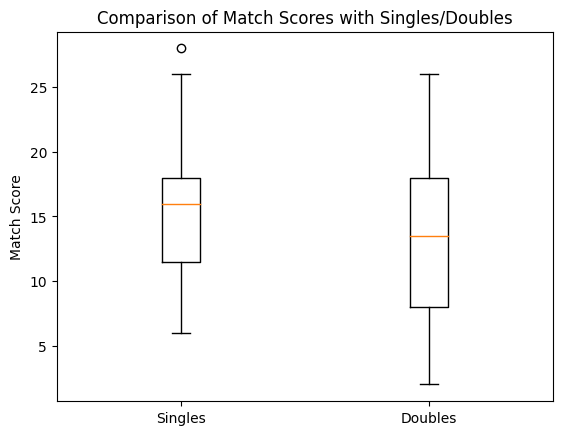

               0
count  60.000000
mean   15.233333
std     5.387892
min     6.000000
25%    11.500000
50%    16.000000
75%    18.000000
max    28.000000
               0
count  84.000000
mean   13.250000
std     6.087465
min     2.000000
25%     8.000000
50%    13.500000
75%    18.000000
max    26.000000


In [27]:
# analyze singles and doubles

singles = []
doubles = []


for match in reformattedMatches:
    if len(match) == 2:
        singles.append(scoreMatch(match))
    else:
        doubles.append(scoreMatch(match))

df_singles = pd.DataFrame(singles)
df_doubles = pd.DataFrame(doubles)

fig, ax = plt.subplots()
ax.boxplot([singles, doubles], labels=['Singles', 'Doubles'])

ax.set_ylabel("Match Score")

plt.title("Comparison of Match Scores with Singles/Doubles")
plt.savefig("schedule/match_score_comparison_singles_doubles")

plt.show()

print(df_singles.describe())
print(df_doubles.describe())



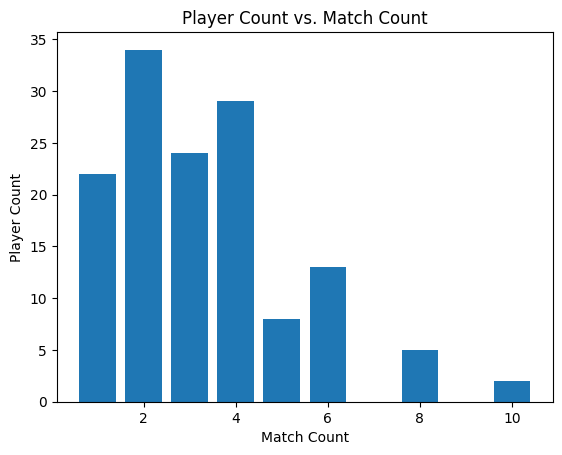

In [28]:
# group players based on # of matches
# sort those matches
# 
groupedPlayers = dict()

for player, count in players.most_common():
    if not count in groupedPlayers:
        groupedPlayers[count] = [player]
    else:
        groupedPlayers[count].append(player)

sortedGroupedPlayers = sorted(list(groupedPlayers.items()), reverse=True)
sortedGroupedPlayers = [list(x) for x in sortedGroupedPlayers]


matchCountX = [x[0] for x in sortedGroupedPlayers]
playerCountY = [len(x[1]) for x in sortedGroupedPlayers]

fig, ax  = plt.subplots()
ax.bar(matchCountX, playerCountY)

ax.set_xlabel('Match Count')
ax.set_ylabel('Player Count')

plt.title("Player Count vs. Match Count")

plt.savefig("schedule/player_count_vs_match_count.png")

plt.show()



In [29]:
sortedGroupedPlayersFinal = []

for index, info in enumerate(sortedGroupedPlayers):
    matchList = []
    for player in info[1]:
        for match in masterDictOfPlayerMatches[player]:
            if not match in matchList:
                matchList.append(match)

    sortedGroupedPlayersFinal.append(sortedGroupedPlayers[index] + [sorted(matchList, key=scoreMatch, reverse=True)])

sortedGroupedPlayersFinal


[[10,
  ['Erika Lai', 'Athena Aguilar'],
  [('Elisa Liu', 'Athena Aguilar'),
   ('Melody Yang', 'Tammy Xie', 'Vivian Yuan', 'Athena Aguilar'),
   ('Emma Chen', 'Athena Aguilar'),
   ('Julie Yang', 'Erika Lai'),
   ('Meghan Wong', 'Erika Lai'),
   ('Elisa Liu', 'Yifei Zheng', 'Andrew Yeow', 'Athena Aguilar'),
   ('Dylan Zou', 'Melissa Hui', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Daniel Fung', 'Sudi Feng', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Ruiqi He', 'Kailin Liu', 'Vivian Yuan', 'Erika Lai'),
   ('Anthony Wu', 'Irene Lee', 'Andrew Yeow', 'Athena Aguilar'),
   ('Cecilia Kuang', 'Erika Lai'),
   ('Hallie Hou', 'Athena Aguilar'),
   ('Jessica To', 'Kaia To', 'Vivian Yuan', 'Erika Lai'),
   ('Benji Ryujin', 'Kaia To', 'Andrew Yeow', 'Athena Aguilar'),
   ('Vivek Srinivasan', 'Jessica To', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Macy Fu', 'Erika Lai'),
   ('Isabelle Rusli', 'Yunus Chang', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Hallie Hou', 'Miranda Li', 'Vivian Yuan', 'Athena Aguilar'

Algorithm

1. Find the match with the highest match score (call it match*). If there are multiple matches with the highest match score, choose match* s.t it contains a player with the highest number of matches
-  Note: need to recalculate after removing matches

2. add it to earliest time in schedule s.t. it fits within the constraints (no conflict in same timeframe)
- consider putting breaks after singles and consecutive doubles
- consider restricting which players can't play at certain times (bc of late arrival or early leave or other conflicts)
- consider lunch break

3. update data structure, removing match in the db

4. repeat back at 1.

In [30]:
MAX_TIMESLOTS = 40
MATCHES_PER_TIMESLOT = 14

FIRST_MATCH_TIME = 8.41667
MATCH_INTERVAL = 25

schedule = [[] for _ in range(MAX_TIMESLOTS)]
player_tracker = [set() for _ in range(MAX_TIMESLOTS)]
player_restrictions = [set() for _ in range(MAX_TIMESLOTS)]

copyDictOfPlayerMatches = copy.deepcopy(masterDictOfPlayerMatches)

def updateSortedMatchesByScore():
    newSortedMatchesByScore = []

    for match, _ in sortedMatchesByScore:
        newSortedMatchesByScore.append([match, scoreMatch(match)])

    return sorted(newSortedMatchesByScore, key=lambda x : x[1], reverse=True)

def place_match_in_schedule(match, schedule, player_tracker, player_restrictions):


    for index, timeslot in enumerate(schedule):
        if any(player in player_restrictions[index] for player in match) :       
            continue

        if len(match) == 2 and any(player in player_tracker[index + 1] for player in match):
            continue

        if len(timeslot) < MATCHES_PER_TIMESLOT and all(player not in player_tracker[index] for player in match):
            timeslot.append(match)
            player_tracker[index].update(match)
            
            update_player_restrictions(match, player_tracker, player_restrictions, index)
            
            break

def update_player_restrictions(match, player_tracker, player_restrictions, index):
    if len(match) == 2:

        player_restrictions[index + 1].update(match)

        if index >= 2:
            for player in match:
                if player in player_tracker[index - 2]: 
                    player_restrictions[index - 1].add(player)
                if player in player_tracker[index - 1]: 
                    player_restrictions[index - 2].add(player)
                    

    elif index == 0:


        for player in match:
            if player in player_tracker[index + 1]: 
                player_restrictions[index + 2].add(player)
            if player in player_tracker[index + 2]: 
                player_restrictions[index + 1].add(player)

    elif index == 1:
        for player in match:
            if player in player_tracker[index + 1]: 
                player_restrictions[index + 2].add(player)
            if player in player_tracker[index + 2]: 
                player_restrictions[index + 1].add(player)
            if player in player_tracker[index - 1]:
                player_restrictions[index + 1].add(player)

    else:
        for player in match:
            if player in player_tracker[index + 2]: 
                player_restrictions[index + 1].add(player)
            if player in player_tracker[index + 1]:
                player_restrictions[index + 2].add(player)
                player_restrictions[index - 1].add(player)
            if player in player_tracker[index - 2]: 
                player_restrictions[index - 1].add(player)
            if player in player_tracker[index - 1]: 
                player_restrictions[index - 2].add(player)
                player_restrictions[index + 1].add(player)
            
        
# initial sort
sortedMatchesByScore = []

for match in reformattedMatches:
    sortedMatchesByScore.append([match, scoreMatch(match)])

sortedMatchesByScore.sort(key=lambda x : x[1], reverse=True)
# -----------------------------------------------------------

while sortedMatchesByScore:

    # remove the match from sortedMatchesByScoreCopy
    highestPriorityMatch = sortedMatchesByScore.pop(0)

    

    # update dictionary
    for player in highestPriorityMatch[0]:
        copyDictOfPlayerMatches[player].remove(highestPriorityMatch[0])

    # place it in the schedule: 
    place_match_in_schedule(highestPriorityMatch[0], schedule, player_tracker, player_restrictions)
  

    # recalculate scores and sort
    sortedMatchesByScore = updateSortedMatchesByScore()

schedule = [x for x in schedule if x != []]
player_tracker = player_tracker[:len(schedule)]
player_restrictions = player_restrictions[:len(schedule)]

len(schedule)


16

In [31]:
player_match_times = dict()
for index, timeslot in enumerate(schedule):
    for match in timeslot:
        for player in match: 
            if player in player_match_times:
                player_match_times[player].append((index, match))
            else:
                player_match_times[player] = [(index, match)]

player_match_times["Ethan Lin"]

[(8, ('Ethan Lin', 'Julie Yang', 'Harshith Kaveri', 'Vivian Yuan')),
 (10, ('Ethan Lin', 'Jeremy Chen', 'Andrew Yeow', 'Muhammad Ramadhan'))]

In [32]:
player_match_times["Andrew Yeow"]

[(0, ('Jordan Hsu', 'Manmeeth Nagesh', 'Andrew Yeow', 'Muhammad Ramadhan')),
 (2, ('Kyle Pan', 'Dylan Zou', 'Andrew Yeow', 'Muhammad Ramadhan')),
 (5, ('Elisa Liu', 'Yifei Zheng', 'Andrew Yeow', 'Athena Aguilar')),
 (7, ('Anthony Wu', 'Irene Lee', 'Andrew Yeow', 'Athena Aguilar')),
 (8, ('Reno Guo', 'Zach Leung', 'Andrew Yeow', 'Muhammad Ramadhan')),
 (10, ('Ethan Lin', 'Jeremy Chen', 'Andrew Yeow', 'Muhammad Ramadhan')),
 (11, ('Benji Ryujin', 'Kaia To', 'Andrew Yeow', 'Athena Aguilar')),
 (14, ('Harry Qin', 'Miranda Li', 'Andrew Yeow', 'Athena Aguilar'))]

In [33]:
# TESTS

# check that all matches are accounted for 

def all_matches_accounted(schedule):
    temp = sum(schedule, [])

    for match in reformattedMatches:
            if not match in temp:
                print(match)

    if set(temp) != set(reformattedMatches):
        print("Not all matches accounted for")


# check for repeats 
def check_for_player_repeats(schedule):

    for index, timeslot in enumerate(schedule):
        check_player_repeats = set()

        for match in timeslot:
            for player in match:
                if player in check_player_repeats:
                    print(f"Repeat player: {match} {player} at index {index}")
                else:
                    check_player_repeats.add(player)

    

def check_for_breaks(schedule):
    pass

def check_for_restrictions(schedule):
    for index, timeslot in enumerate(schedule):

        for player in player_restrictions[index]:
            for match in timeslot:
                if player in match:
                    print(player, index)

    
all_matches_accounted(schedule)
check_for_player_repeats(schedule)
check_for_restrictions(schedule)




In [34]:


# Extract the integer and decimal parts of FIRST_MATCH_TIME
hours = math.floor(FIRST_MATCH_TIME)
minutes = int((FIRST_MATCH_TIME % 1) * 60)

# Create a datetime object
first_match = datetime(datetime.now().year, datetime.now().month, datetime.now().day, hours, minutes, 0)


def create_final_schedule_df(schedule):
    
    d = {'match_time': [], 'players_1': [], 'players_2': []}
    for index, timeslot in enumerate(schedule):
        match_time = first_match + timedelta(minutes=index*MATCH_INTERVAL)
        formatted_time = match_time.strftime("%I:%M %p")

        for match in timeslot:
            
            d['match_time'].append(formatted_time)
            if len(match) == 2:
                d['players_1'].append(match[0])
                d['players_2'].append(match[1])
            else:
                d['players_1'].append(f"{match[0]}/{match[1]}")
                d['players_2'].append(f"{match[2]}/{match[3]}")


    return pd.DataFrame(data=d)




final_schedule_df = create_final_schedule_df(schedule)
final_schedule_df

,match_time,players_1,players_2
0,08:25 AM,Elisa Liu,Athena Aguilar
1,08:25 AM,Julie Yang,Erika Lai
2,08:25 AM,Mihir Raja,Harshith Kaveri
3,08:25 AM,Kyle Pan,Matthew Go
4,08:25 AM,Jordan Hsu/Manmeeth Nagesh,Andrew Yeow/Muhammad Ramadhan
...,...,...,...
139,01:50 PM,Macy Fu,Erika Lai
140,01:50 PM,Huy Nguyen/Lynette Loo,Harshith Kaveri/Vivian Yuan
141,02:15 PM,Harry Qin/Miranda Li,Andrew Yeow/Athena Aguilar
142,02:40 PM,Vivek Srinivasan/Jessica To,Muhammad Ramadhan/Erika Lai


In [35]:
timeslot_d = {'timeslot': [], 'matches_in_timeslot': []}


for timeslot in final_schedule_df['match_time']:
    if timeslot in timeslot_d['timeslot']:
        timeslot_d['matches_in_timeslot'][-1] += 1
    
    else:
        timeslot_d['timeslot'].append(timeslot)
        timeslot_d['matches_in_timeslot'].append(1)

match_time_counter_df = pd.DataFrame(data=timeslot_d)

match_time_counter_df.to_csv('schedule/match_time_counter.csv', index=False)

In [36]:
player_matches_df = pd.DataFrame(data=players.most_common(), columns=['player', 'match_count'])
player_matches_df.set_index('player')


for index, matches in enumerate(schedule):
    
    match_time = first_match + timedelta(minutes=index*MATCH_INTERVAL)
    formatted_time = match_time.strftime("%I:%M %p")

    player_matches_df[formatted_time] = [None for _ in range(len(player_matches_df))]
    timeslot = timeslot_d['timeslot'][index]
    for match in matches:

        reformatted_match = f"{match[0]} - {match[1]}" if len(match) == 2 else f"{match[0]}/{match[1]} - {match[2]}/{match[3]}" 

        for player in match:
            
            player_matches_df.loc[player_matches_df['player'] == player, [formatted_time]] = reformatted_match


player_matches_df.to_csv('schedule/player_matches.csv', index=False)
player_matches_df
    

,player,match_count,08:25 AM,08:50 AM,09:15 AM,09:40 AM,10:05 AM,10:30 AM,10:55 AM,11:20 AM,11:45 AM,12:10 PM,12:35 PM,01:00 PM,01:25 PM,01:50 PM,02:15 PM,02:40 PM
0,Erika Lai,10,Julie Yang - Erika Lai,None,Meghan Wong - Erika Lai,None,Dylan Zou/Melissa Hui - Muhammad Ramadhan/Erik...,Ruiqi He/Kailin Liu - Vivian Yuan/Erika Lai,None,Daniel Fung/Sudi Feng - Muhammad Ramadhan/Erik...,Cecilia Kuang - Erika Lai,None,Jessica To/Kaia To - Vivian Yuan/Erika Lai,Isabelle Rusli/Yunus Chang - Muhammad Ramadhan...,None,Macy Fu - Erika Lai,None,Vivek Srinivasan/Jessica To - Muhammad Ramadha...
1,Athena Aguilar,10,Elisa Liu - Athena Aguilar,None,Emma Chen - Athena Aguilar,None,Melody Yang/Tammy Xie - Vivian Yuan/Athena Agu...,Elisa Liu/Yifei Zheng - Andrew Yeow/Athena Agu...,None,Anthony Wu/Irene Lee - Andrew Yeow/Athena Aguilar,Hallie Hou - Athena Aguilar,None,None,Benji Ryujin/Kaia To - Andrew Yeow/Athena Aguilar,Hallie Hou/Miranda Li - Vivian Yuan/Athena Agu...,None,Harry Qin/Miranda Li - Andrew Yeow/Athena Aguilar,Gita Anand - Athena Aguilar
2,Harshith Kaveri,8,Mihir Raja - Harshith Kaveri,None,Mihir Raja/Tammy Xie - Harshith Kaveri/Vivian ...,Daniel Fung - Harshith Kaveri,None,Reno Guo - Harshith Kaveri,None,Max Li/Kailin Liu - Harshith Kaveri/Vivian Yuan,Ethan Lin/Julie Yang - Harshith Kaveri/Vivian ...,None,Andrew Wang - Harshith Kaveri,None,None,Huy Nguyen/Lynette Loo - Harshith Kaveri/Vivia...,None,None
3,Matthew Go,8,Kyle Pan - Matthew Go,None,Wein Hsu - Matthew Go,None,Vivek Srinivasan - Matthew Go,None,Venkata Neti/Anthony Wu - Matthew Go/Daniel Chang,Brenden Cheung - Matthew Go,None,Benji Ryujin/Andrew Li - Matthew Go/Willy Su,None,Oscar Yan/Lantian Xiang - Matthew Go/Willy Su,JJ Choon/Samuel Chua Jia Cong - Matthew Go/Dan...,None,None,None
4,Andrew Yeow,8,Jordan Hsu/Manmeeth Nagesh - Andrew Yeow/Muham...,None,Kyle Pan/Dylan Zou - Andrew Yeow/Muhammad Rama...,None,None,Elisa Liu/Yifei Zheng - Andrew Yeow/Athena Agu...,None,Anthony Wu/Irene Lee - Andrew Yeow/Athena Aguilar,Reno Guo/Zach Leung - Andrew Yeow/Muhammad Ram...,None,Ethan Lin/Jeremy Chen - Andrew Yeow/Muhammad R...,Benji Ryujin/Kaia To - Andrew Yeow/Athena Aguilar,None,None,Harry Qin/Miranda Li - Andrew Yeow/Athena Aguilar,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Alan Le,1,None,None,None,None,None,None,Andrew Li/Macy Fu - Jennifer Zheng/Alan Le,None,None,None,None,None,None,None,None,None
133,Gita Anand,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Gita Anand - Athena Aguilar
134,Kyrell Ringpis,1,None,None,None,None,None,Austin Tsang/Kyrell Ringpis - Patrick Austin/A...,None,None,None,None,None,None,None,None,None,None
135,Pham Nguyen,1,None,None,None,None,None,None,Pham Nguyen - Jordan Hsu,None,None,None,None,None,None,None,None,None


In [37]:

final_schedule_df.to_csv('schedule/final_schedule.csv', index=False)